In [1]:
import pandas as pd
import spacy
import emoji
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('El Rubius_videos.csv')
df = df[df['transcript'] != 'Subtitle not available']
df['transcript'] = df['transcript'].str.replace('\xa0__\xa0', 'xxxx')

In [3]:
# Load Spanish tokenizer, POS tagger, parser, NER and word vectors
nlp = spacy.load('es_core_news_sm')

def preprocess(text):
    # Lowercase the text
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove emojis
    text = emoji.replace_emoji(text, replace='')

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize, remove stop words, and lemmatize using SpaCy's Spanish model
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

    return tokens


In [4]:
# Apply preprocessing to each column
df['title'] = df['title'].apply(preprocess)
df['description'] = df['description'].apply(preprocess)
df['transcript'] = df['transcript'].apply(preprocess)

In [5]:
# Save the DataFrame as CSV
df.to_csv('preprocessed_data.csv', index=False)

In [6]:
# Title
# Word frequency analysis
title_tokens = [token for title in df['title'] for token in title]

# Count the occurrences of each token
word_freq = Counter(title_tokens)

# Display the 10 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('karmaland', 140), ('v', 58), ('minecraft', 35), ('rubius', 27), ('us', 19), ('among', 18), ('casa', 13), ('vegetta', 11), ('detroit', 11), ('become', 11), ('human', 11), ('the', 10), ('of', 10), ('volver', 10), ('vs', 10)]
         Word  Frequency
0   karmaland        140
1           v         58
2   minecraft         35
3      rubius         27
4          us         19
5       among         18
6        casa         13
7     vegetta         11
8     detroit         11
9      become         11
10      human         11
11        the         10
12         of         10
13     volver         10
14         vs         10


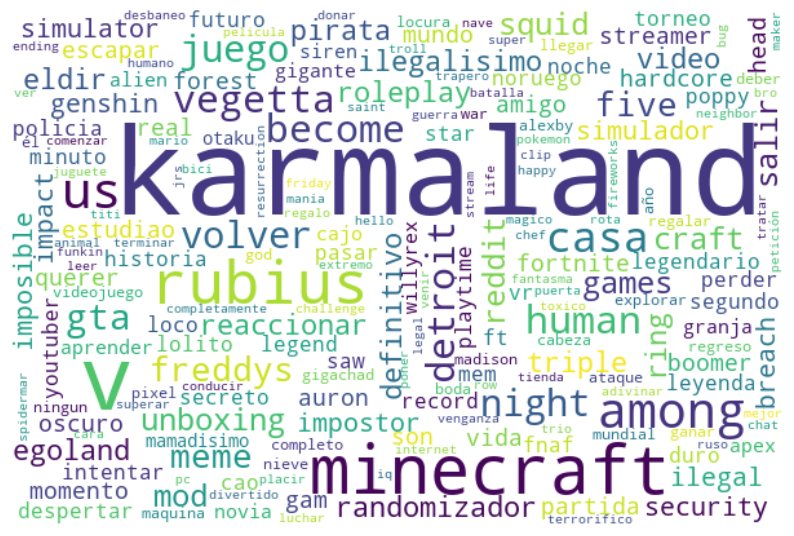

In [7]:

title_words = ' '.join([' '.join(doc) for doc in df['title']])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(title_words)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("title_wordcloud.png")

plt.show()


In [8]:
# Description
# Word frequency analysis
description_tokens = [token for description in df['description'] for token in description]

# Count the occurrences of each token
word_freq = Counter(description_tokens)

# Display the 15 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('like', 371), ('discord', 315), ('streams', 309), ('tienda', 283), ('directo', 38), ('d', 27), ('querer', 15), ('juego', 13), ('karmaland', 13), ('twitch', 13), ('casa', 11), ('likir', 10), ('ad', 10), ('mañana', 9), ('server', 9)]
         Word  Frequency
0        like        371
1     discord        315
2     streams        309
3      tienda        283
4     directo         38
5           d         27
6      querer         15
7       juego         13
8   karmaland         13
9      twitch         13
10       casa         11
11      likir         10
12         ad         10
13     mañana          9
14     server          9


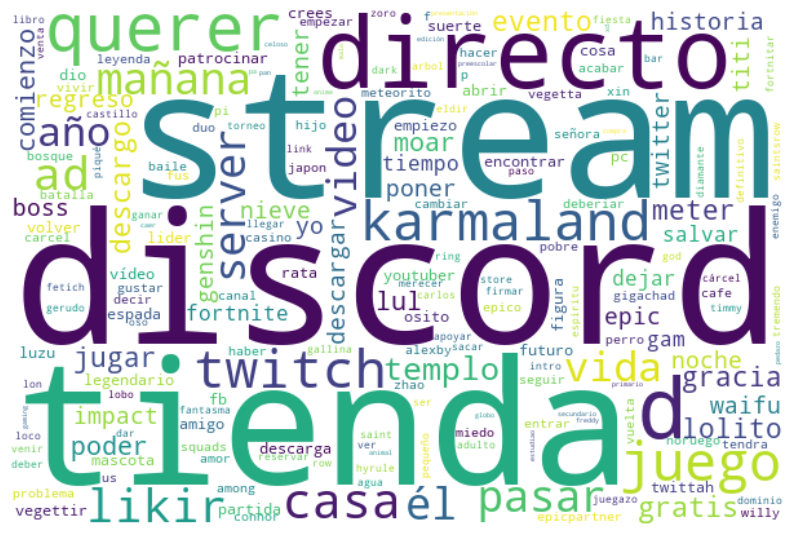

In [9]:

description_words = ' '.join([' '.join(doc) for doc in df['description']])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(description_words)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("description_wordcloud.png")

plt.show()
